In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
file_path = "coin_Bitcoin.csv" 
df = pd.read_csv(file_path)


In [3]:
print(df.head()) 
print("\nDataset Info:")
print(df.info())  
print("\nSummary Statistics:")
print(df.describe())  

   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null  

In [4]:
print("\nMissing Values Per Column:")
print(df.isnull().sum())



Missing Values Per Column:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


In [5]:
df = df.dropna()

print("\nDataset after removing missing values:")
print(df.info())


Dataset after removing missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB
None


In [6]:
print("\nDuplicate Rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()
df = df.loc[(df['Date'] >= '2017-04-01')]

print("\nDataset after removing duplicates:")
print(df.info())


Duplicate Rows: 0

Dataset after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
Index: 1558 entries, 1433 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        1558 non-null   int64  
 1   Name       1558 non-null   object 
 2   Symbol     1558 non-null   object 
 3   Date       1558 non-null   object 
 4   High       1558 non-null   float64
 5   Low        1558 non-null   float64
 6   Open       1558 non-null   float64
 7   Close      1558 non-null   float64
 8   Volume     1558 non-null   float64
 9   Marketcap  1558 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 133.9+ KB
None


In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
# Check for invalid dates
print("\nInvalid Dates:", df['Date'].isna().sum())


Invalid Dates: 0


In [9]:
# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

In [10]:
print("\nDataset after handling dates:")
print(df.info())


Dataset after handling dates:
<class 'pandas.core.frame.DataFrame'>
Index: 1558 entries, 1433 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        1558 non-null   int64         
 1   Name       1558 non-null   object        
 2   Symbol     1558 non-null   object        
 3   Date       1558 non-null   datetime64[ns]
 4   High       1558 non-null   float64       
 5   Low        1558 non-null   float64       
 6   Open       1558 non-null   float64       
 7   Close      1558 non-null   float64       
 8   Volume     1558 non-null   float64       
 9   Marketcap  1558 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 133.9+ KB
None


In [11]:
# Ensure numerical columns are valid
numeric_columns = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with non-numeric values in key columns
df = df.dropna(subset=numeric_columns)

# Remove rows with negative values (optional)
df = df[(df['High'] >= 0) & (df['Low'] >= 0) & (df['Open'] >= 0) & (df['Close'] >= 0)]
df = df[df['Volume'] >= 0]

print("\nDataset after cleaning numerical data:")
print(df.describe())


Dataset after cleaning numerical data:
               SNo                           Date          High           Low  \
count  1558.000000                           1558   1558.000000   1558.000000   
mean   2212.500000  2019-05-20 11:59:59.000000512  12803.087670  12040.672240   
min    1434.000000            2017-04-01 23:59:59   1091.719971   1061.089966   
25%    1823.250000            2018-04-26 05:59:59   6075.757324   5722.060181   
50%    2212.500000            2019-05-20 11:59:59   8451.996527   8102.608087   
75%    2601.750000            2020-06-12 17:59:59  11426.622792  10826.781567   
max    2991.000000            2021-07-06 23:59:59  64863.098908  62208.964366   
std     449.900174                            NaN  13686.035816  12742.240388   

               Open         Close        Volume     Marketcap  
count   1558.000000   1558.000000  1.558000e+03  1.558000e+03  
mean   12441.706096  12462.561991  2.089052e+10  2.259959e+11  
min     1071.709961   1080.500000  1.8

In [12]:
df = df.sort_values(by='Date')

print("\nDataset after sorting by date:")
print(df.head())


Dataset after sorting by date:
       SNo     Name Symbol                Date         High          Low  \
1433  1434  Bitcoin    BTC 2017-04-01 23:59:59  1091.719971  1061.089966   
1434  1435  Bitcoin    BTC 2017-04-02 23:59:59  1107.589966  1075.449951   
1435  1436  Bitcoin    BTC 2017-04-03 23:59:59  1151.739990  1102.949951   
1436  1437  Bitcoin    BTC 2017-04-04 23:59:59  1156.439941  1120.520020   
1437  1438  Bitcoin    BTC 2017-04-05 23:59:59  1135.089966  1113.630005   

             Open        Close       Volume     Marketcap  
1433  1071.709961  1080.500000  289633984.0  1.755760e+10  
1434  1080.609985  1102.170044  514187008.0  1.791192e+10  
1435  1102.949951  1143.810059  580444032.0  1.859116e+10  
1436  1145.520020  1133.250000  436310016.0  1.842126e+10  
1437  1134.140015  1124.780029  414784000.0  1.828586e+10  


In [13]:
if 'SNo' in df.columns:
    df = df.drop(columns=['SNo'])

print("\nDataset after dropping unnecessary columns:")
print(df.head())



Dataset after dropping unnecessary columns:
         Name Symbol                Date         High          Low  \
1433  Bitcoin    BTC 2017-04-01 23:59:59  1091.719971  1061.089966   
1434  Bitcoin    BTC 2017-04-02 23:59:59  1107.589966  1075.449951   
1435  Bitcoin    BTC 2017-04-03 23:59:59  1151.739990  1102.949951   
1436  Bitcoin    BTC 2017-04-04 23:59:59  1156.439941  1120.520020   
1437  Bitcoin    BTC 2017-04-05 23:59:59  1135.089966  1113.630005   

             Open        Close       Volume     Marketcap  
1433  1071.709961  1080.500000  289633984.0  1.755760e+10  
1434  1080.609985  1102.170044  514187008.0  1.791192e+10  
1435  1102.949951  1143.810059  580444032.0  1.859116e+10  
1436  1145.520020  1133.250000  436310016.0  1.842126e+10  
1437  1134.140015  1124.780029  414784000.0  1.828586e+10  


In [14]:
df = df.drop(columns=['Name', 'Symbol'])

print("\nDataset after dropping unnecessary columns:")
print(df.head())


Dataset after dropping unnecessary columns:
                    Date         High          Low         Open        Close  \
1433 2017-04-01 23:59:59  1091.719971  1061.089966  1071.709961  1080.500000   
1434 2017-04-02 23:59:59  1107.589966  1075.449951  1080.609985  1102.170044   
1435 2017-04-03 23:59:59  1151.739990  1102.949951  1102.949951  1143.810059   
1436 2017-04-04 23:59:59  1156.439941  1120.520020  1145.520020  1133.250000   
1437 2017-04-05 23:59:59  1135.089966  1113.630005  1134.140015  1124.780029   

           Volume     Marketcap  
1433  289633984.0  1.755760e+10  
1434  514187008.0  1.791192e+10  
1435  580444032.0  1.859116e+10  
1436  436310016.0  1.842126e+10  
1437  414784000.0  1.828586e+10  


In [15]:
# Save the cleaned dataset to a new file
cleaned_file_path = "cleaned_coin_Bitcoin.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: cleaned_coin_Bitcoin.csv


In [16]:
# Calculate daily returns (percentage change)
df['Daily Return'] = df['Close'].pct_change()

In [17]:
# Calculate moving averages (50-day and 200-day)
df['50-Day MA'] = df['Close'].rolling(window=50).mean()
df['200-Day MA'] = df['Close'].rolling(window=200).mean()

In [18]:
# Calculate the difference between High and Low (for volatility)
df['Price Diff'] = df['High'] - df['Low']


In [19]:
# Calculate volatility (standard deviation of daily returns)
df['Volatility'] = df['Daily Return'].rolling(window=50).std()


In [20]:
df = df.dropna()

In [21]:
print(df.head())

                    Date         High          Low         Open        Close  \
1632 2017-10-17 23:59:59  5800.350098  5472.720215  5741.580078  5605.509766   
1633 2017-10-18 23:59:59  5603.819824  5151.439941  5603.819824  5590.689941   
1634 2017-10-19 23:59:59  5744.350098  5531.060059  5583.740234  5708.520020   
1635 2017-10-20 23:59:59  6060.109863  5627.229980  5708.109863  6011.450195   
1636 2017-10-21 23:59:59  6194.879883  5965.069824  5996.790039  6031.600098   

            Volume     Marketcap  Daily Return    50-Day MA   200-Day MA  \
1632  1.821570e+09  9.321830e+10     -0.020973  4384.099590  2889.060897   
1633  2.399270e+09  9.298254e+10     -0.002644  4404.332988  2911.611847   
1634  1.780540e+09  9.495481e+10      0.021076  4427.197393  2934.643597   
1635  2.354430e+09  1.000071e+11      0.053066  4453.358594  2958.981797   
1636  2.207100e+09  1.003537e+11      0.003352  4476.150400  2983.473548   

      Price Diff  Volatility  
1632  327.629883    0.055357  


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 1632 to 2990
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1359 non-null   datetime64[ns]
 1   High          1359 non-null   float64       
 2   Low           1359 non-null   float64       
 3   Open          1359 non-null   float64       
 4   Close         1359 non-null   float64       
 5   Volume        1359 non-null   float64       
 6   Marketcap     1359 non-null   float64       
 7   Daily Return  1359 non-null   float64       
 8   50-Day MA     1359 non-null   float64       
 9   200-Day MA    1359 non-null   float64       
 10  Price Diff    1359 non-null   float64       
 11  Volatility    1359 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 138.0 KB


In [23]:
df.to_csv(cleaned_file_path, index=False)

In [24]:
df.to_csv(cleaned_file_path, index=False)


In [25]:
# Add derived features
df['Open-Close Diff'] = df['Open'] - df['Close']
df['High-Low Range'] = df['High'] - df['Low']
df.to_csv(cleaned_file_path, index=False)
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap',
       'Daily Return', '50-Day MA', '200-Day MA', 'Price Diff', 'Volatility',
       'Open-Close Diff', 'High-Low Range'],
      dtype='object')

In [26]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Select columns to scale (excluding 'Date')
cols_to_scale = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap',
                 'Daily Return', '50-Day MA', '200-Day MA', 'Price Diff', 
                 'Volatility', 'Open-Close Diff', 'High-Low Range']

# Separate scaler for the target ('Close')
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

df[cols_to_scale] = feature_scaler.fit_transform(df[cols_to_scale])
df[['Close']] = target_scaler.fit_transform(df[['Close']])  # Fit separately

# Save both scalers
joblib.dump(feature_scaler, 'feature_scaler.pkl')
joblib.dump(target_scaler, 'target_scaler.pkl')

# Save the dataset
df.to_csv("scaled_data.csv", index=False)


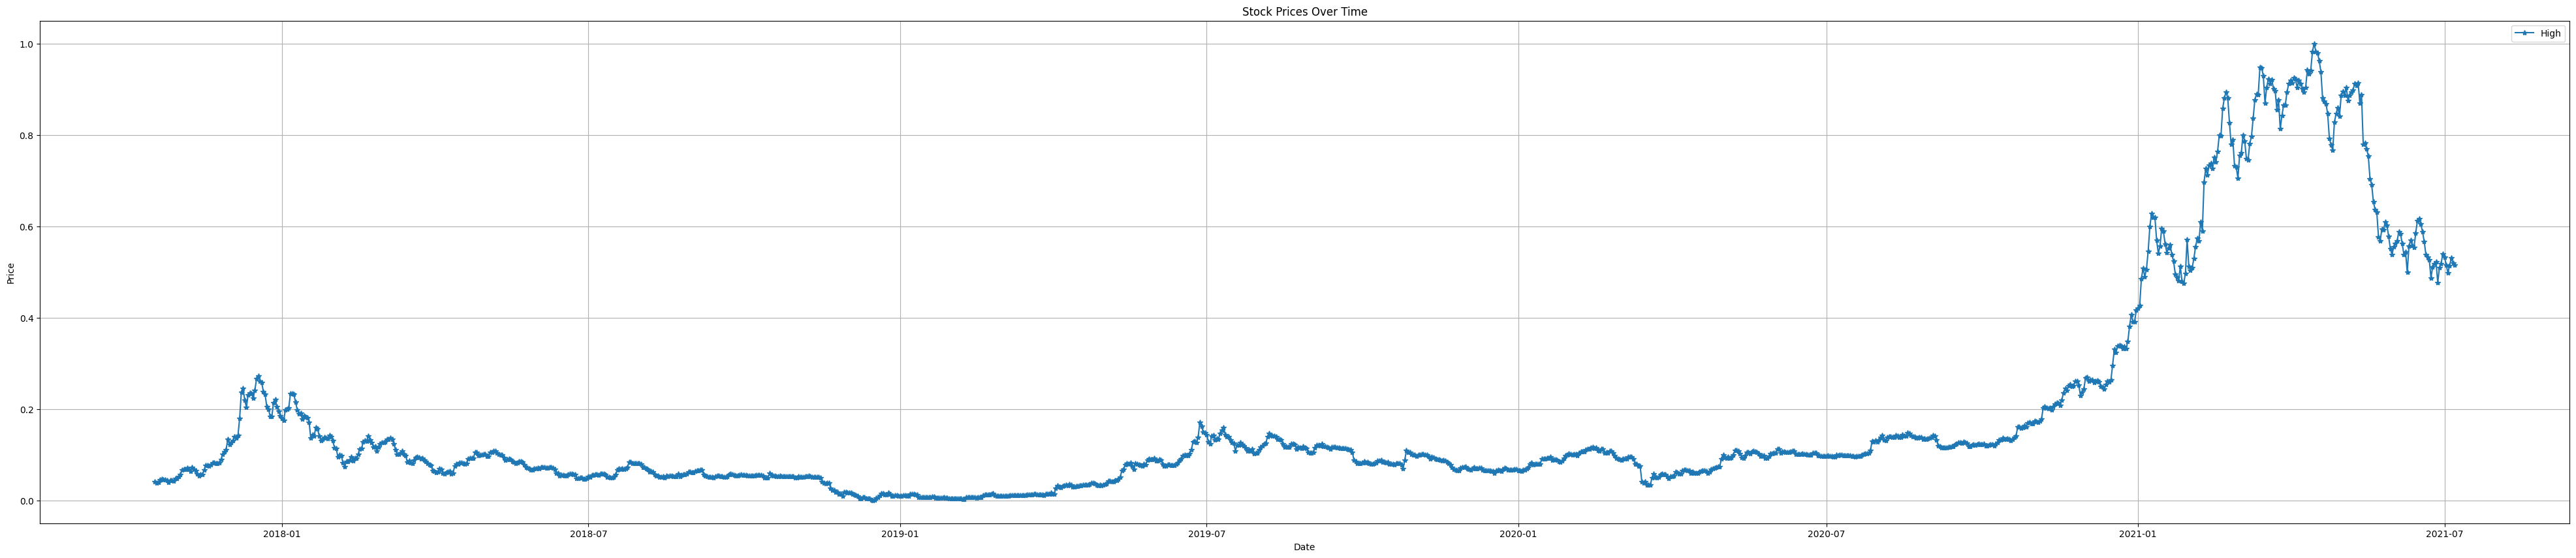

In [27]:

df = pd.DataFrame(df)
df['Date'] = pd.to_datetime(df['Date'])
df.to_csv(cleaned_file_path, index=False)


df.set_index('Date', inplace=True)       

# Plot the graph
plt.figure(figsize=(50,10))
plt.plot(df.index, df['High'], label='High', marker='*')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

#plt.savefig("test")

plt.show()
